In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


nhldata = pd.read_excel('/weather2024.xlsx')

In [ ]:
print(nhldata.head())

            ID                    ID 2                    ID 3  \
0  44853 17421  Florida Panthers 44853  Florida Panthers 22-23   
1  44855 17531  Florida Panthers 44855  Florida Panthers 22-23   
2  44857 16342  Florida Panthers 44857  Florida Panthers 22-23   
3  44863 15577  Florida Panthers 44863  Florida Panthers 22-23   
4  44874 13225  Florida Panthers 44874  Florida Panthers 22-23   

                 ID 4                   ID 5 Season              Team  \
0  Broward FL 2022 10  Broward FL 2022 10 19  22-23  Florida Panthers   
1  Broward FL 2022 10  Broward FL 2022 10 21  22-23  Florida Panthers   
2  Broward FL 2022 10  Broward FL 2022 10 23  22-23  Florida Panthers   
3  Broward FL 2022 10  Broward FL 2022 10 29  22-23  Florida Panthers   
4  Broward FL 2022 11  Broward FL 2022 11 09  22-23  Florida Panthers   

  County and State    tmin    tmax  ...  Ave Age of Team  Ave Goals Scored   \
0       Broward FL  19.553  29.797  ...             28.7               3.51   
1     

In [ ]:
nhldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              7141 non-null   object        
 1   ID 2                            7141 non-null   object        
 2   ID 3                            7141 non-null   object        
 3   ID 4                            5550 non-null   object        
 4   ID 5                            5550 non-null   object        
 5   Season                          7141 non-null   object        
 6   Team                            7141 non-null   object        
 7   County and State                5550 non-null   object        
 8   tmin                            4682 non-null   float64       
 9   tmax                            4682 non-null   float64       
 10  tave                            4682 non-null   float64       
 11  GP  

# **EDA**

In [ ]:

nhldata['Att.'] = nhldata['Att.'].astype(str).str.replace(',', '')

nhldata['Att.'] = pd.to_numeric(nhldata['Att.'], errors='coerce')

average_attendance = nhldata.groupby('Home Team')['Att.'].mean().reset_index()

average_attendance.columns = ['Home Team', 'Average Attendance']

average_attendance = average_attendance.sort_values(by='Average Attendance', ascending=False)

print(average_attendance)

                Home Team  Average Attendance
15     Montreal Canadiens        20473.504202
6      Chicago Blackhawks        19529.518828
25    Tampa Bay Lightning        19067.928870
26    Toronto Maple Leafs        18696.502128
10      Detroit Red Wings        18594.237500
9            Dallas Stars        18589.991632
14         Minnesota Wild        18427.312500
27      Vancouver Canucks        18379.890756
29    Washington Capitals        18308.578059
21    Philadelphia Flyers        18300.179167
28   Vegas Golden Knights        18138.536585
22    Pittsburgh Penguins        18062.196653
24        St. Louis Blues        17897.326360
2           Boston Bruins        17865.812500
7      Colorado Avalanche        17862.914573
11        Edmonton Oilers        17837.213389
5     Carolina Hurricanes        17601.348739
16    Nashville Predators        17554.437500
19       New York Rangers        17538.414938
4          Calgary Flames        17371.004202
13      Los Angeles Kings        1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


nhldata = pd.read_excel('/weather2024.xlsx')

df = pd.DataFrame(nhldata)



   Year  Average Attendance
0  2018             17162.0
1  2019             17424.0
2  2020             17662.0
3  2021             15886.0
4  2022             16275.0
5  2023             17320.0
6  2024             17687.0


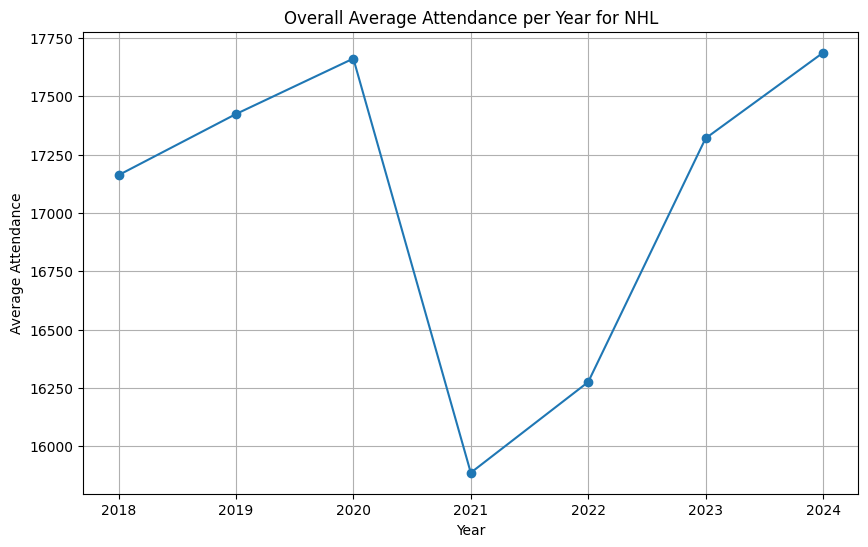

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df['Year'] = df['Date'].dt.year


average_attendance_per_year = df.groupby('Year')['Att.'].mean().reset_index()


average_attendance_per_year['Att.'] = average_attendance_per_year['Att.'].round()

average_attendance_per_year.columns = ['Year', 'Average Attendance']

print(average_attendance_per_year)
plt.figure(figsize=(10, 6))
plt.plot(average_attendance_per_year['Year'], average_attendance_per_year['Average Attendance'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.title('Overall Average Attendance per Year for NHL')
plt.grid(True)
plt.show()

  Season  Average Attendance
0  18-19             17426.0
1  19-20             17374.0
2  21-22             15912.0
3  22-23             17031.0
4  23-24             17550.0


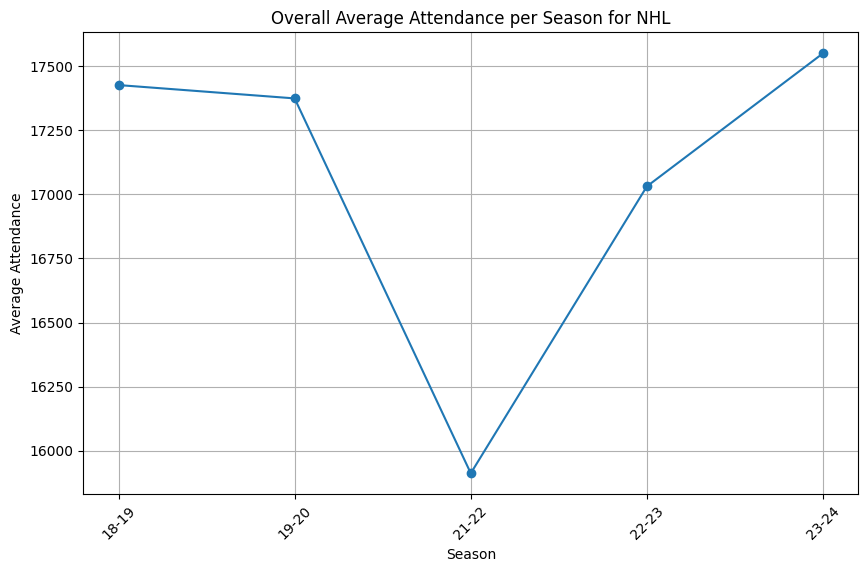

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['Att.'] = df['Att.'].astype(str).str.replace(',', '')


df['Att.'] = pd.to_numeric(df['Att.'], errors='coerce')


average_attendance_per_season = df.groupby('Season')['Att.'].mean().reset_index()


average_attendance_per_season['Att.'] = average_attendance_per_season['Att.'].round()


average_attendance_per_season.columns = ['Season', 'Average Attendance']


print(average_attendance_per_season)


plt.figure(figsize=(10, 6))
plt.plot(average_attendance_per_season['Season'], average_attendance_per_season['Average Attendance'], marker='o', linestyle='-')
plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.title('Overall Average Attendance per Season for NHL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


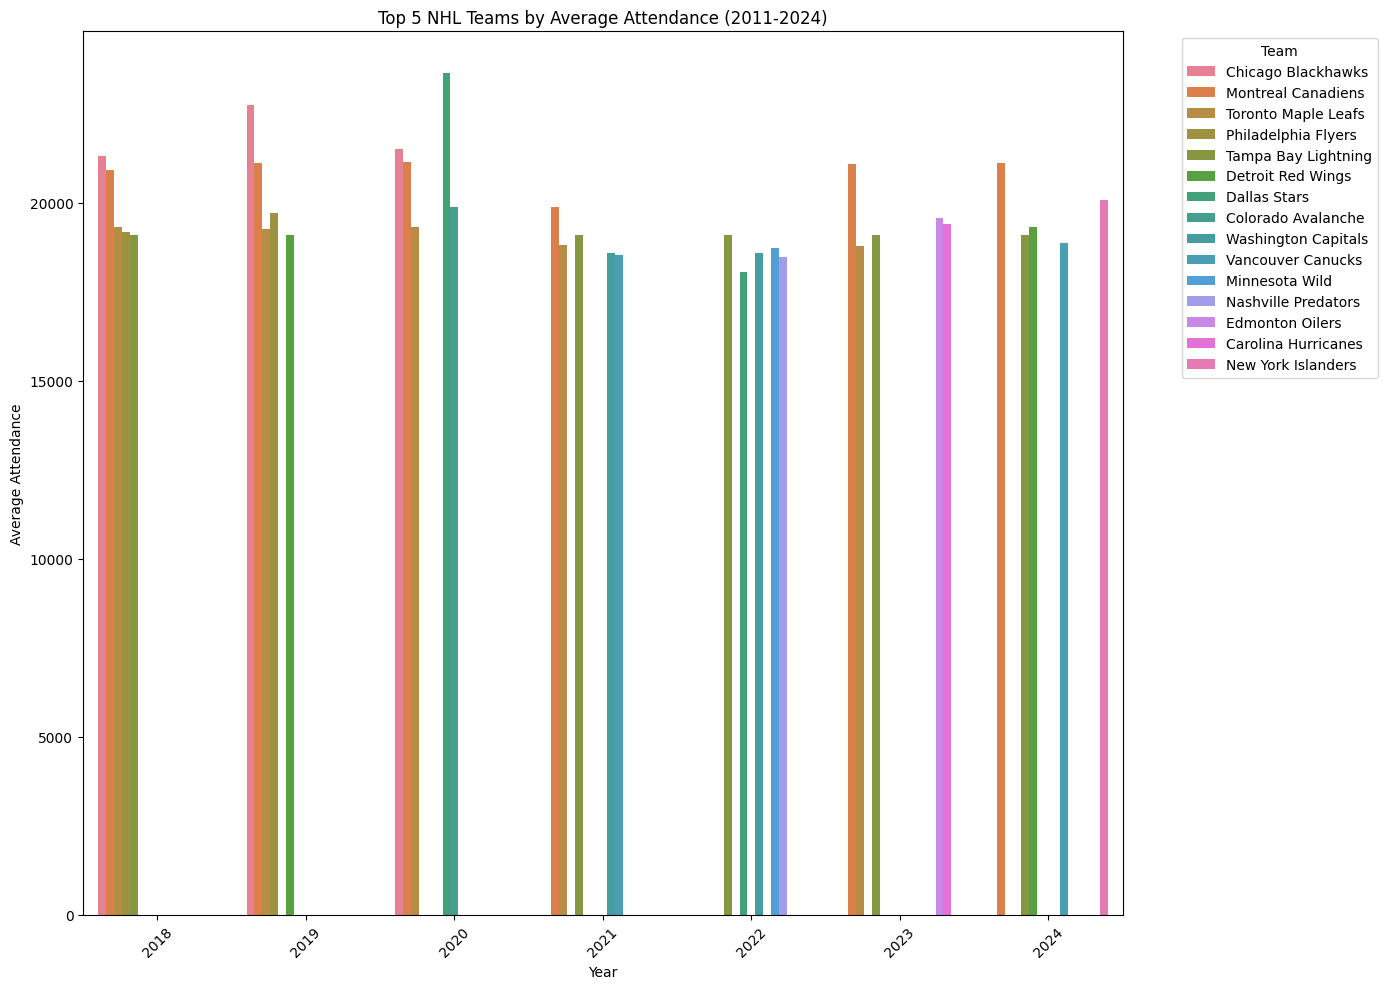

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


nhldata['Date'] = pd.to_datetime(nhldata['Date'])

nhldata['Year'] = nhldata['Date'].dt.year

filtered_data = nhldata[(nhldata['Year'] >= 2011) & (nhldata['Year'] <= 2024)]

average_attendance = filtered_data.groupby(['Home Team', 'Year'])['Att.'].mean().reset_index()


average_attendance['Att.'] = average_attendance['Att.'].round()

average_attendance.columns = ['Team', 'Year', 'Average Attendance']


def get_top_5_teams_per_year(df):
    top_5_per_year = df.groupby('Year').apply(lambda x: x.nlargest(5, 'Average Attendance')).reset_index(drop=True)
    return top_5_per_year


top_5_teams_per_year = get_top_5_teams_per_year(average_attendance)


plt.figure(figsize=(14, 10))
sns.barplot(data=top_5_teams_per_year, x='Year', y='Average Attendance', hue='Team', dodge=True)

plt.title('Top 5 NHL Teams by Average Attendance (2011-2024)')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<ipython-input-10-b4c800de42b8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Attendance', y='Home Team', data=average_attendance, palette='viridis')


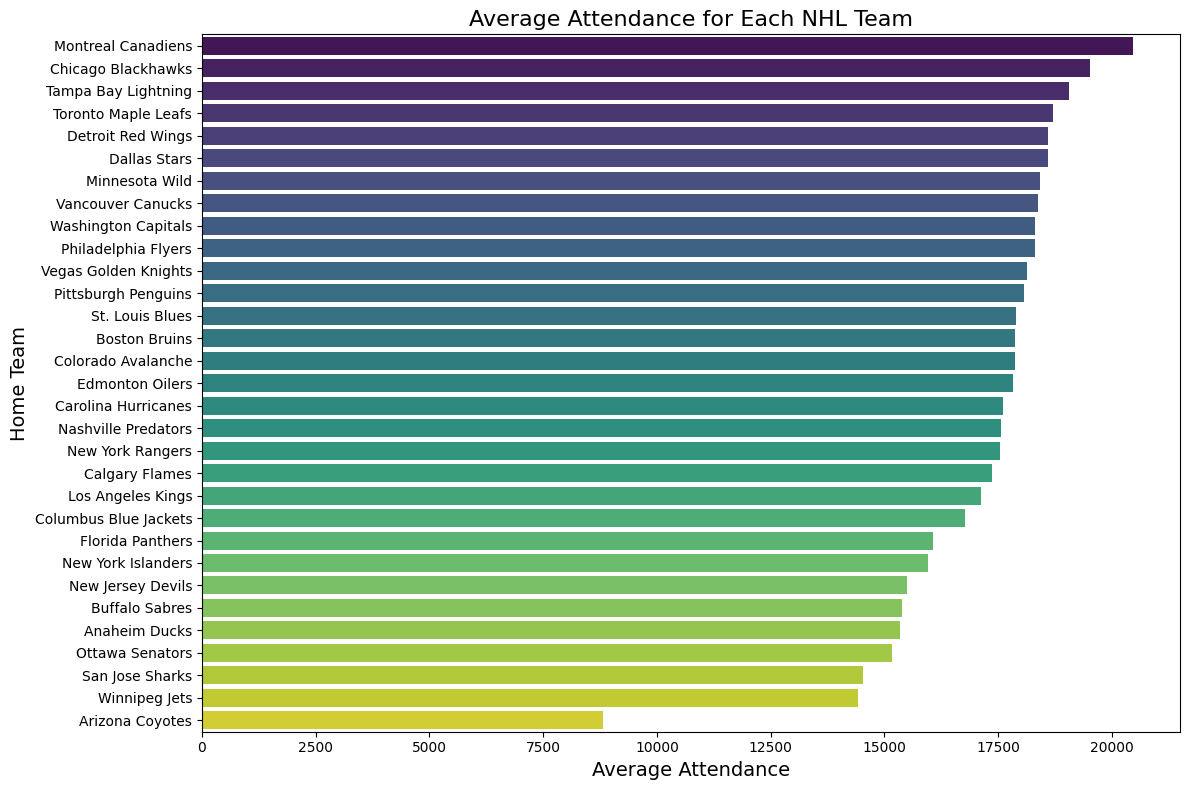

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

nhldata['Att.'] = pd.to_numeric(nhldata['Att.'].astype(str).str.replace(',', ''), errors='coerce')


average_attendance = nhldata.groupby('Home Team')['Att.'].mean().reset_index()


average_attendance.columns = ['Home Team', 'Average Attendance']


average_attendance = average_attendance.sort_values(by='Average Attendance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Average Attendance', y='Home Team', data=average_attendance, palette='viridis')


plt.title('Average Attendance for Each NHL Team', fontsize=16)
plt.xlabel('Average Attendance', fontsize=14)
plt.ylabel('Home Team', fontsize=14)

plt.tight_layout()

plt.show()

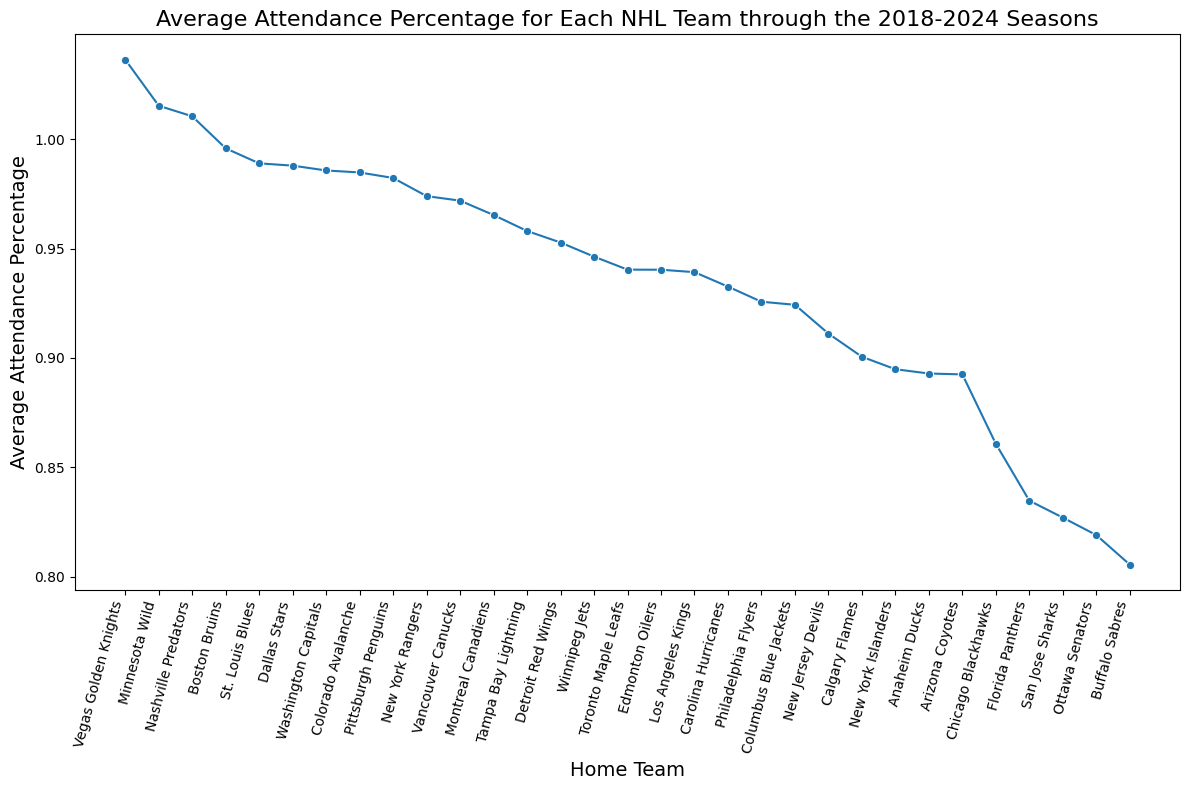

In [ ]:

average_attendance_percentage = nhldata.groupby('Home Team')['Att. %'].mean().reset_index()


average_attendance_percentage.columns = ['Home Team', 'Average Attendance Percentage']


average_attendance_percentage = average_attendance_percentage.sort_values(by='Average Attendance Percentage', ascending=False)


plt.figure(figsize=(12, 8))


sns.lineplot(data=average_attendance_percentage, x='Home Team', y='Average Attendance Percentage', marker='o')


plt.xticks(rotation=75, ha='right')


plt.title('Average Attendance Percentage for Each NHL Team through the 2018-2024 Seasons', fontsize=16)
plt.xlabel('Home Team', fontsize=14)
plt.ylabel('Average Attendance Percentage', fontsize=14)


plt.tight_layout()
plt.show()

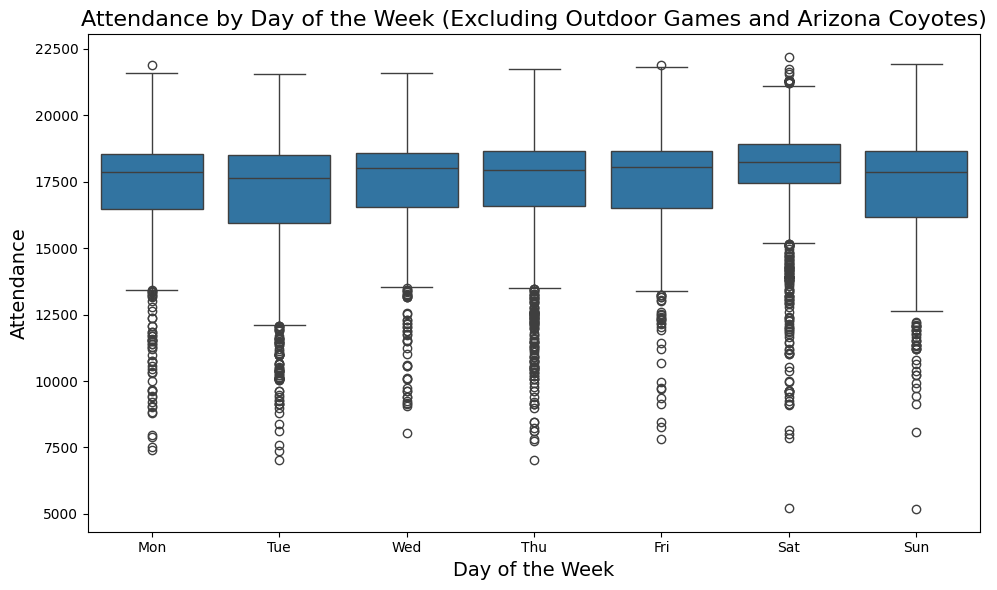

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


filtered_nhldata = nhldata[(nhldata['Att.'] >= 5000) & (nhldata['Att.'] <= 25000) & (nhldata['Home Team'] != 'Arizona Coyotes')]


order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Att.', data=filtered_nhldata, order=order)


plt.title('Attendance by Day of the Week (Excluding Outdoor Games and Arizona Coyotes)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Attendance', fontsize=14)


plt.tight_layout()
plt.show()

  Full Time  Minutes
0  19:30:00     1170
1  19:30:00     1170
2  17:00:00     1020
3  16:00:00      960
4  19:00:00     1140


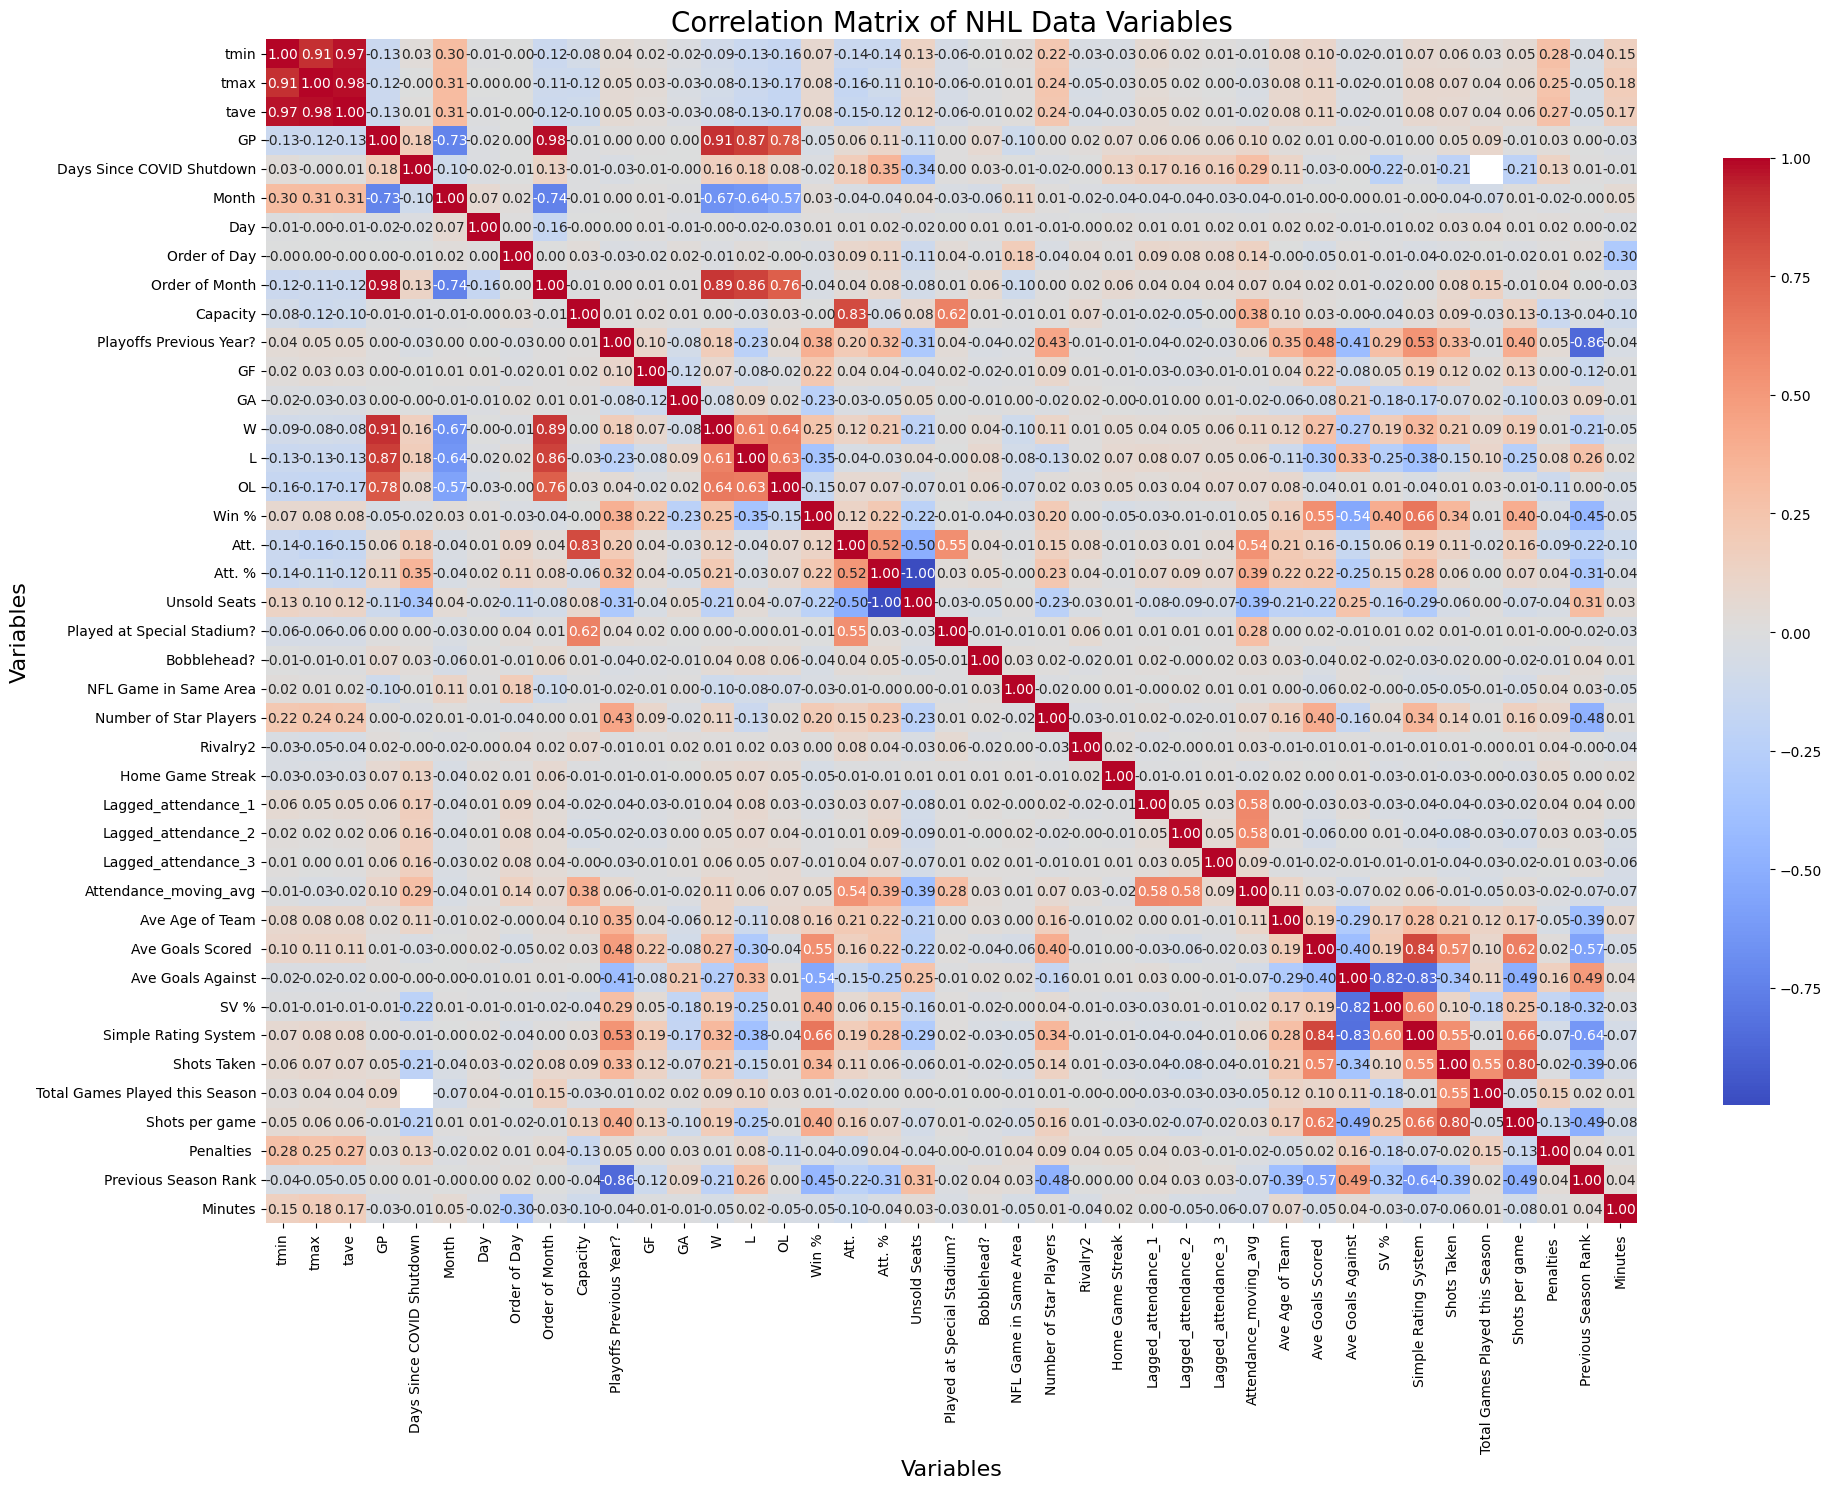

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Converting Time of the Game to hours after midnight
nhldata['Full Time'] = pd.to_datetime(nhldata['Full Time'], format='%H:%M:%S').dt.time

nhldata['Minutes'] = nhldata['Full Time'].apply(lambda x: x.hour * 60 + x.minute)


print(nhldata[['Full Time', 'Minutes']].head())


numeric_df = nhldata.select_dtypes(include=['int64', 'float64', 'uint8']).copy()
numeric_df['Minutes'] = nhldata['Minutes']  # Adding the 'Minutes' column for correlation

#Building the correlation matrix of all variables
corr_matrix = numeric_df.corr()


plt.figure(figsize=(20, 15))


sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8}, annot_kws={"size": 10})  # Slightly larger annotation font


plt.title('Correlation Matrix of NHL Data Variables', fontsize=20)  # Increase title font size
plt.xlabel('Variables', fontsize=16)
plt.ylabel('Variables', fontsize=16)

plt.tight_layout()
plt.show()

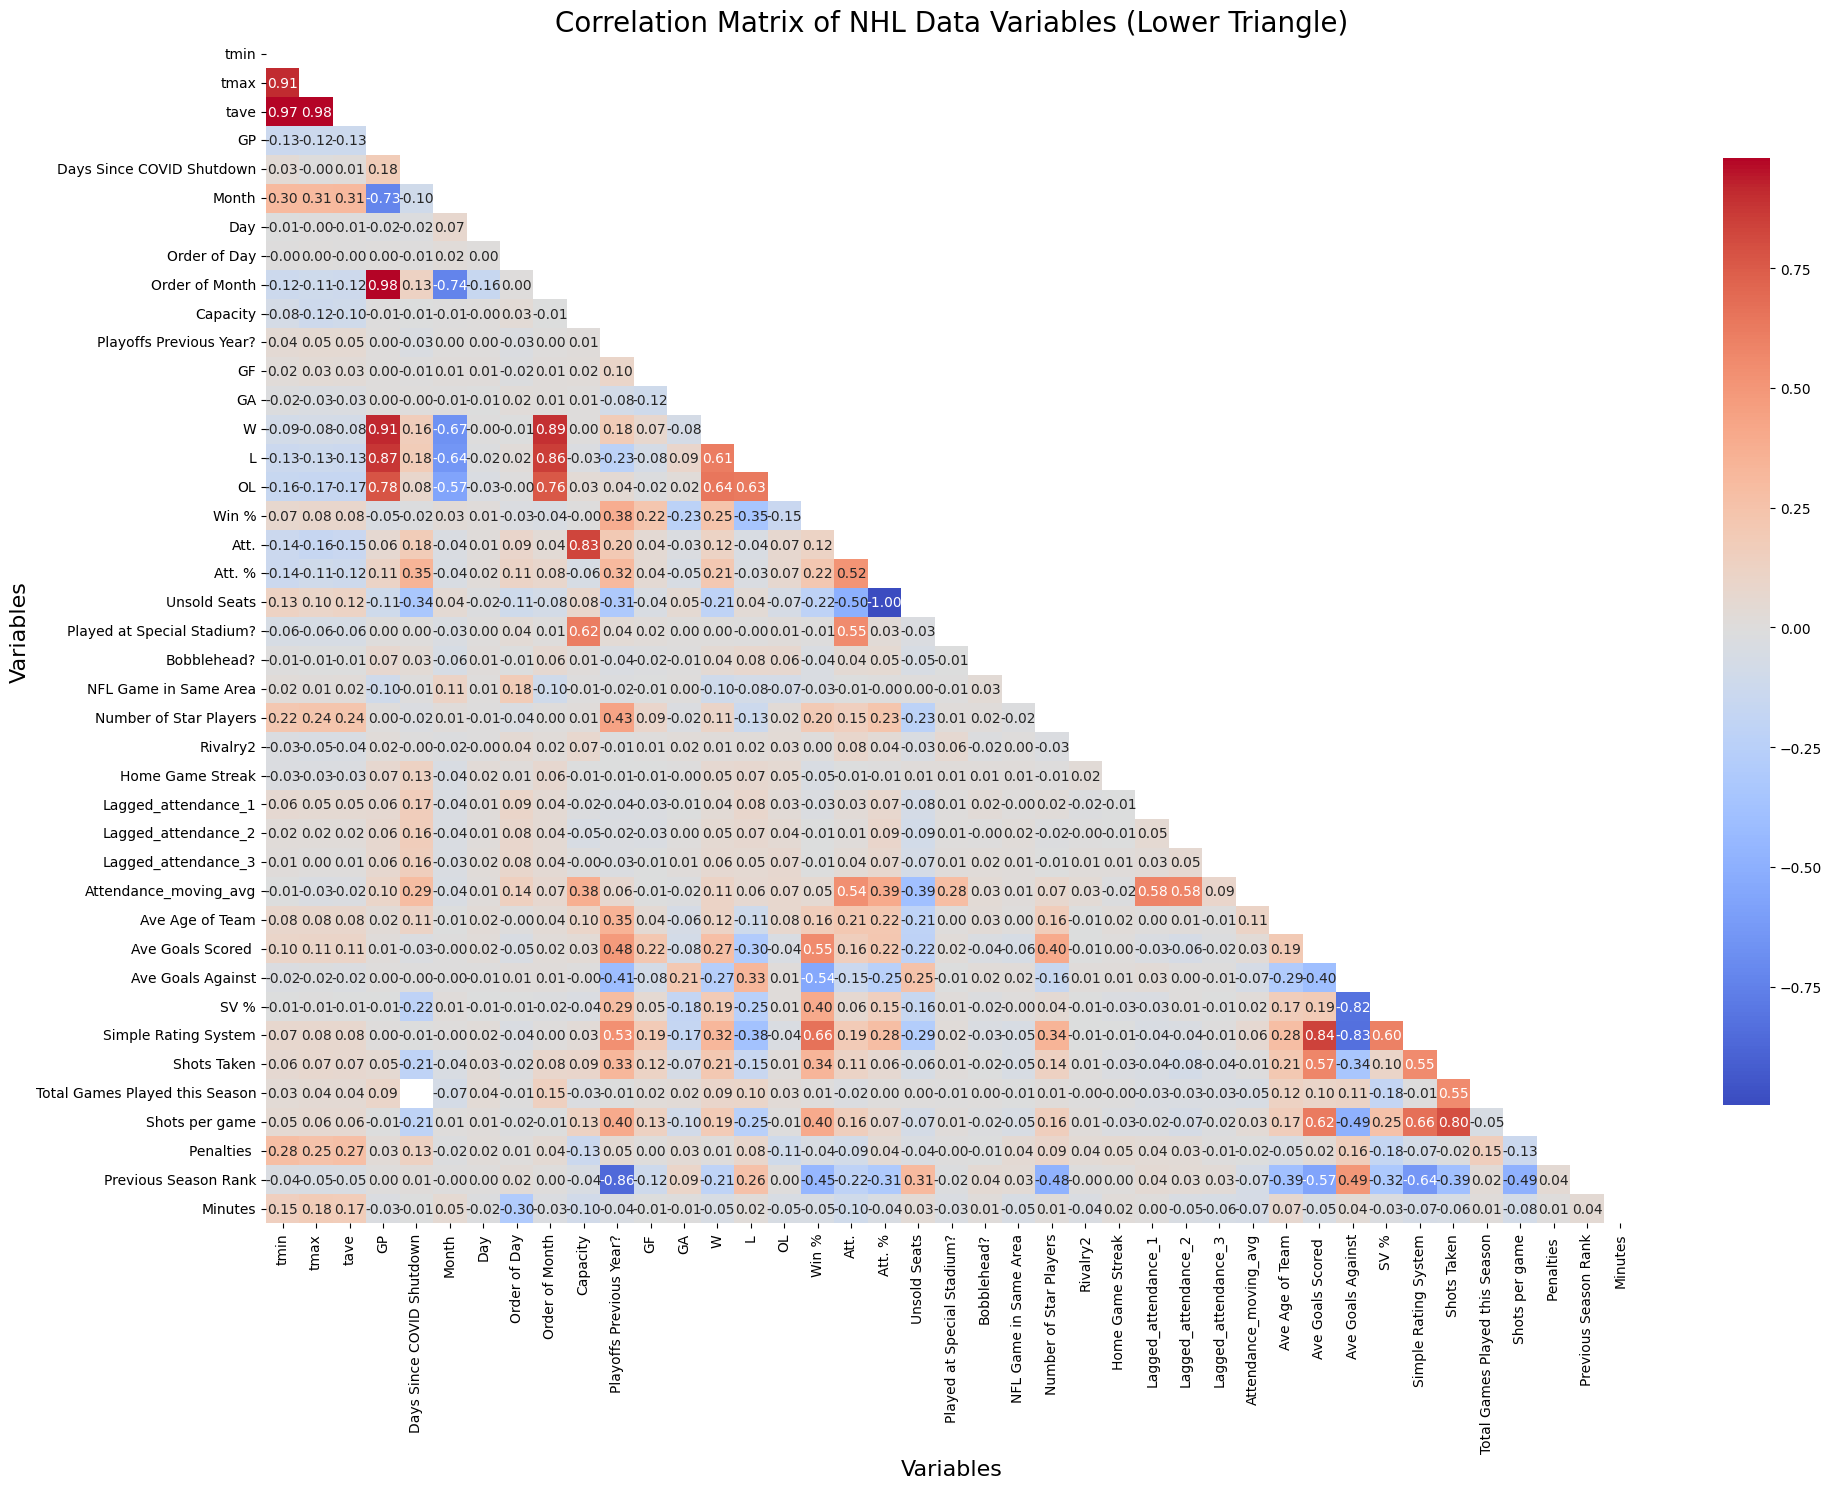

In [ ]:

corr_matrix = numeric_df.corr()

#half correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(20, 15))


sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8}, annot_kws={"size": 10})

plt.title('Correlation Matrix of NHL Data Variables (Lower Triangle)', fontsize=20)
plt.xlabel('Variables', fontsize=16)
plt.ylabel('Variables', fontsize=16)


plt.tight_layout()


plt.show()

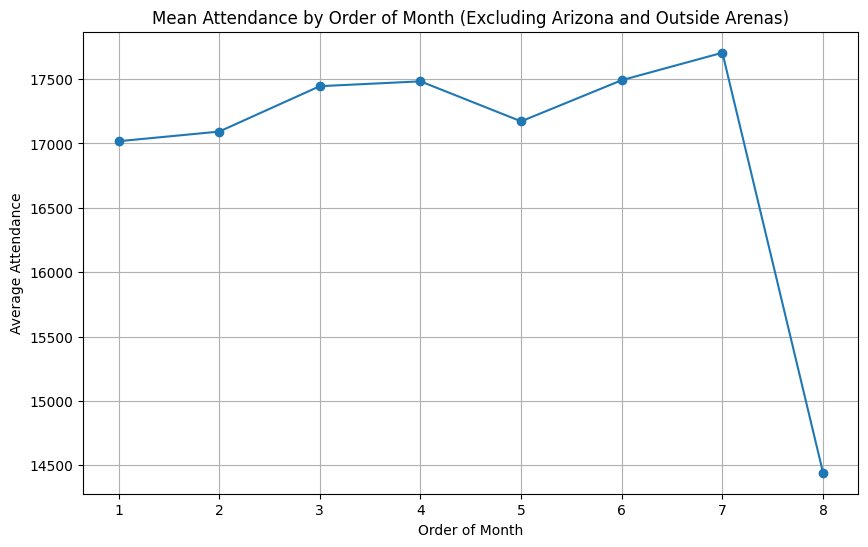

In [ ]:

filtered_data = nhldata[(nhldata['Home Team'] != 'Arizona Coyotes') & (nhldata['Att.'] <= 25000)]

order_attendance = filtered_data.groupby('Order of Month')['Att.'].mean()
order_attendance = order_attendance.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(order_attendance['Order of Month'], order_attendance['Att.'], marker='o', linestyle='-')
plt.title('Mean Attendance by Order of Month (Excluding Arizona and Outside Arenas)')
plt.xlabel('Order of Month')
plt.ylabel('Average Attendance')
plt.grid(True)
plt.show()

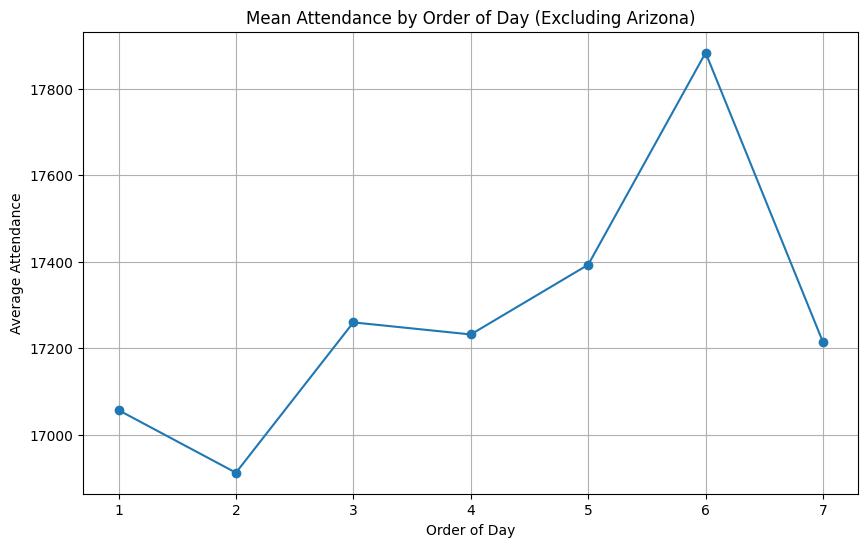

In [ ]:

filtered_data = nhldata[(nhldata['Home Team'] != 'Arizona Coyotes') & (nhldata['Att.'] <= 25000)]


order_attendance = filtered_data.groupby('Order of Day')['Att.'].mean()
order_attendance = order_attendance.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(order_attendance['Order of Day'], order_attendance['Att.'], marker='o', linestyle='-')
plt.title('Mean Attendance by Order of Day (Excluding Arizona)')
plt.xlabel('Order of Day')
plt.ylabel('Average Attendance')
plt.grid(True)
plt.show()

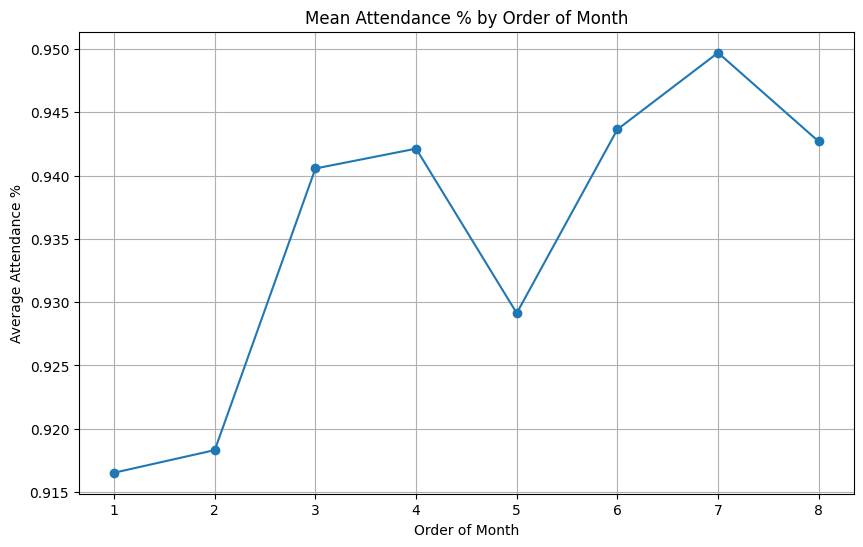

In [ ]:

filtered_data = nhldata[(nhldata['Att.'] <= 25000)]


order_attendance = filtered_data.groupby('Order of Month')['Att. %'].mean()
order_attendance = order_attendance.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(order_attendance['Order of Month'], order_attendance['Att. %'], marker='o', linestyle='-')
plt.title('Mean Attendance % by Order of Month')
plt.xlabel('Order of Month')
plt.ylabel('Average Attendance %')
plt.grid(True)
plt.show()

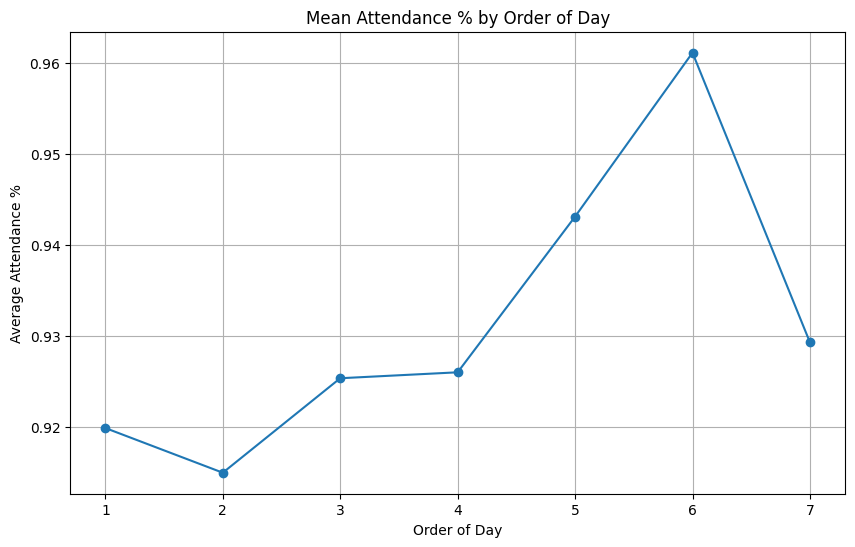

In [ ]:

filtered_data = nhldata[(nhldata['Att.'] <= 25000)]


order_attendance = filtered_data.groupby('Order of Day')['Att. %'].mean()
order_attendance = order_attendance.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(order_attendance['Order of Day'], order_attendance['Att. %'], marker='o', linestyle='-')
plt.title('Mean Attendance % by Order of Day')
plt.xlabel('Order of Day')
plt.ylabel('Average Attendance %')
plt.grid(True)
plt.show()

                      Feature  Importance
27       Simple Rating System    0.283642
22      Attendance_moving_avg    0.155782
23            Ave Age of Team    0.104982
31                 Penalties     0.070724
4   Days Since COVID Shutdown    0.053741
32       Previous Season Rank    0.045181
28                Shots Taken    0.031026
30             Shots per game    0.030458
7                Order of Day    0.025897
24          Ave Goals Scored     0.023155
26                       SV %    0.020547
33                    Minutes    0.016926
25          Ave Goals Against    0.015928
15                      Win %    0.014533
13                          L    0.011467
12                          W    0.010950
6                         Day    0.010603
0                        tmin    0.010430
3                          GP    0.010274
1                        tmax    0.008983


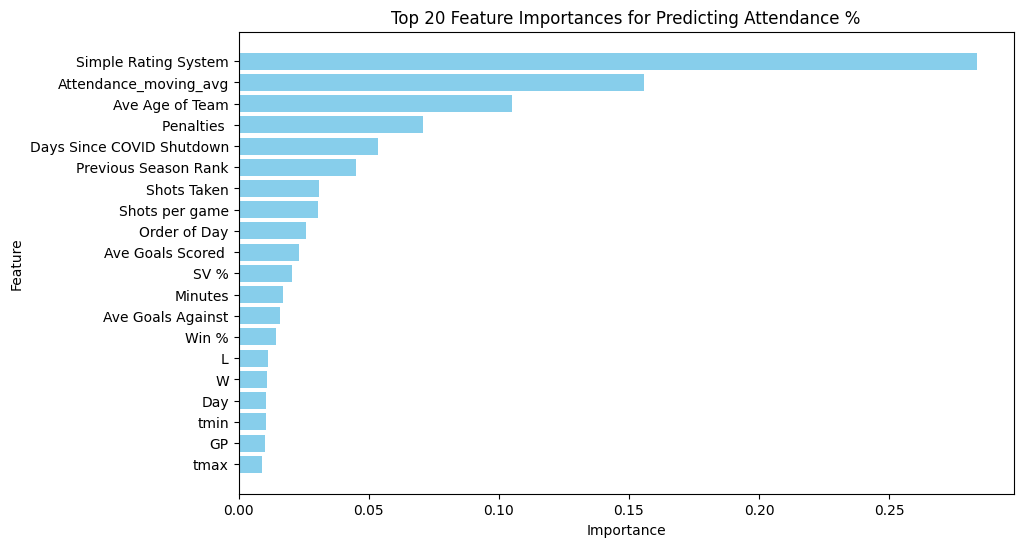

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


nhldata['Att.'] = nhldata['Att.'].astype(str).str.replace(',', '')
nhldata['Att.'] = pd.to_numeric(nhldata['Att.'], errors='coerce')
nhldata['Att. %'] = pd.to_numeric(nhldata['Att. %'], errors='coerce')

#excluding Att., Att. %, Unsold Seats, Capacity, and lagged attendance variables
features = nhldata.select_dtypes(include=['int64', 'float64']).columns.drop(['Att.', 'Att. %', 'Unsold Seats', 'Capacity'])

features = [col for col in features if "Lagged_attendance" not in col]

X = nhldata[features]
y = nhldata['Att. %']

#Removing rows w/ NaN values
X = X.dropna()
y = y.loc[X.index]

#standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Random Forest model to predict Att. %
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

#feature importances
feature_importances = model.feature_importances_

#get top 20
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances for Predicting Attendance %')
plt.gca().invert_yaxis()
plt.show()

## Gradient Boosting Model looking just at attendance - performed better than previous LSTM model but still low performing

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

nhldata['Att.'] = pd.to_numeric(nhldata['Att.'].astype(str).str.replace(',', ''), errors='coerce')
nhldata = nhldata.dropna(subset=['Att.'])

features = ['GP', 'Order of Day', 'Order of Month', 'GF', 'GA', 'W', 'L', 'Win %', 'Month', 'OL']
target = 'Att.'

X = nhldata[features].values
y = nhldata[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# gradient boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Training the model
gbr.fit(X_train_scaled, y_train.ravel())  # Using ravel() to ensure y_train is the correct shape

#predictions
y_pred = gbr.predict(X_test_scaled)

#model evaluation on accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 1892.4953910807342
MSE: 11214906.414060943
RMSE: 3348.866437178548
R2 Score: 0.22806466607840847


# **Model 1 - LSTM Model looking at attendance percentage as target**

      Att.  Capacity  Normalized_Attendance
0  17421.0     19250               0.904987
1  17531.0     19250               0.910701
2  16342.0     19250               0.848935
3  15577.0     19250               0.809195
4  13225.0     19250               0.687013


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0576 - val_loss: 0.0064
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193 - val_loss: 0.0075
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180 - val_loss: 0.0074
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0170 - val_loss: 0.0071
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0178 - val_loss: 0.0068
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0076
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0063
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0078
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - val_loss: 0.0070
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - val_loss: 0.0076
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - val_loss: 0.0088
Epoch 12/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/st

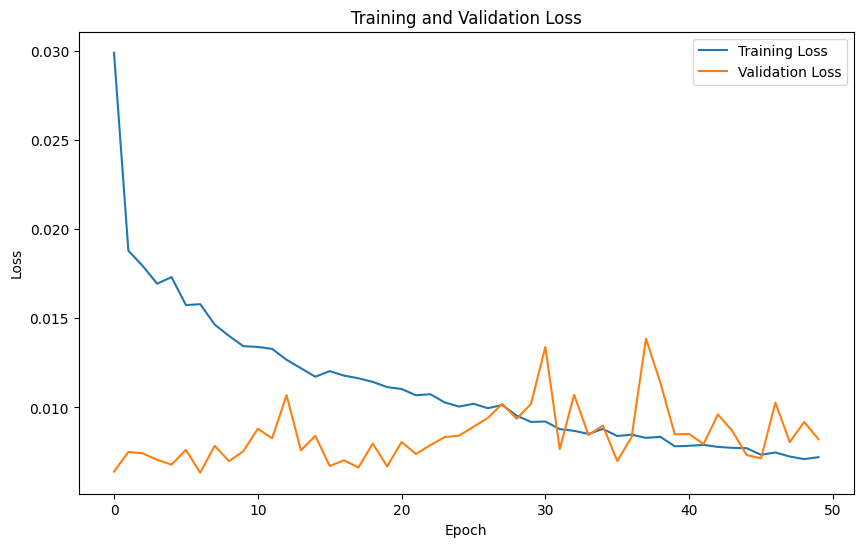

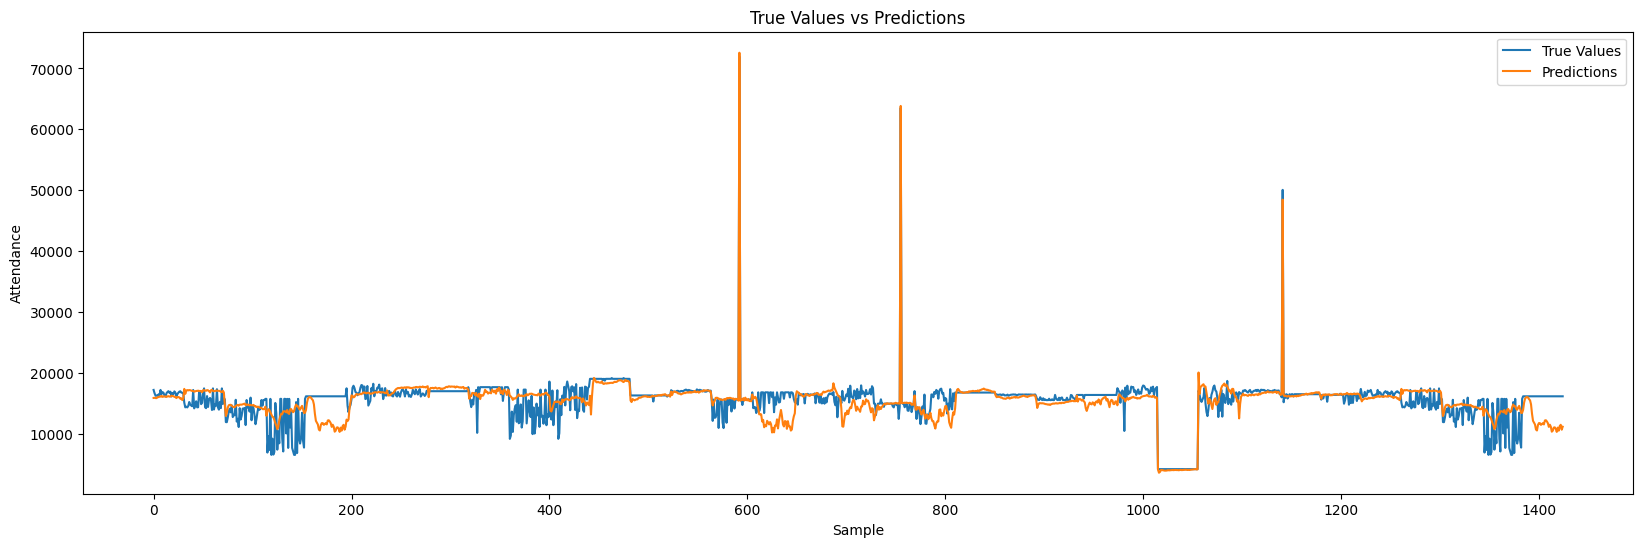

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


data = pd.read_excel('/weather2024.xlsx')


data['Full Time'] = pd.to_datetime(data['Full Time'], format='%H:%M:%S', errors='coerce')

# Converting full time to minutes after midnight
def time_to_minutes(time):
    if pd.isna(time):
        return np.nan
    return time.hour * 60 + time.minute

data['Minutes'] = data['Full Time'].apply(time_to_minutes)

# Droping 'Full Time' column after converting to 'Minutes'
data = data.drop(columns=['Full Time'])


data['Att.'] = pd.to_numeric(data['Att.'], errors='coerce')
data['Capacity'] = pd.to_numeric(data['Capacity'], errors='coerce')

#Drop rows with NaN values
data = data.dropna(subset=['Att.', 'Capacity'])

# Normalize the attendance as a percentage of stadium capacity
data['Normalized_Attendance'] = data['Att.'] / data['Capacity']

print(data[['Att.', 'Capacity', 'Normalized_Attendance']].head())

#features
features = [
    'Simple Rating System', 'Attendance_moving_avg', 'Ave Age of Team',
    'Penalties ', 'Days Since COVID Shutdown', 'Previous Season Rank',
    'Shots per game', 'Order of Day', 'Ave Goals Scored ', 'SV %', 'Win %',
    'L', 'W', 'Day', 'Ave Goals Against', 'tmin', 'tmax', 'GP', 'Capacity', 'Minutes'
]

#Impute missing values with median
for col in features:
    data[col].fillna(data[col].median(), inplace=True)


capacity = data[['Capacity']].values

#normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features + ['Normalized_Attendance']])

#createsequences
def create_sequences(data, seq_length, target_column):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].drop(columns=[target_column]).values
        label = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


seq_length = 10
X, y = create_sequences(pd.DataFrame(scaled_data, columns=features + ['Normalized_Attendance']), seq_length, 'Normalized_Attendance')

#split datset into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

#predictions
predictions = model.predict(X_test)

predictions = predictions.flatten()

predictions_actual = predictions * capacity[-len(predictions):].flatten()
y_test_actual = y_test * capacity[-len(y_test):].flatten()

#evaluate accuracy
mae = mean_absolute_error(y_test_actual, predictions_actual)
mse = mean_squared_error(y_test_actual, predictions_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions_actual)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

#loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#predictions vs actual values
plt.figure(figsize=(20, 6))
plt.plot(y_test_actual, label='True Values')
plt.plot(predictions_actual, label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('Sample')
plt.ylabel('Attendance')
plt.legend()
plt.show()

## **Model 2 - Gradient Boosting Model with attendance percentage as target**

      Att.  Capacity  Normalized_Attendance
0  17421.0     19250               0.904987
1  17531.0     19250               0.910701
2  16342.0     19250               0.848935
3  15577.0     19250               0.809195
4  13225.0     19250               0.687013
Mean Absolute Error: 559.5826166575113
Mean Squared Error: 862440.1113719869
Root Mean Squared Error: 928.6765375371485
R² Score: 0.9301198416469415


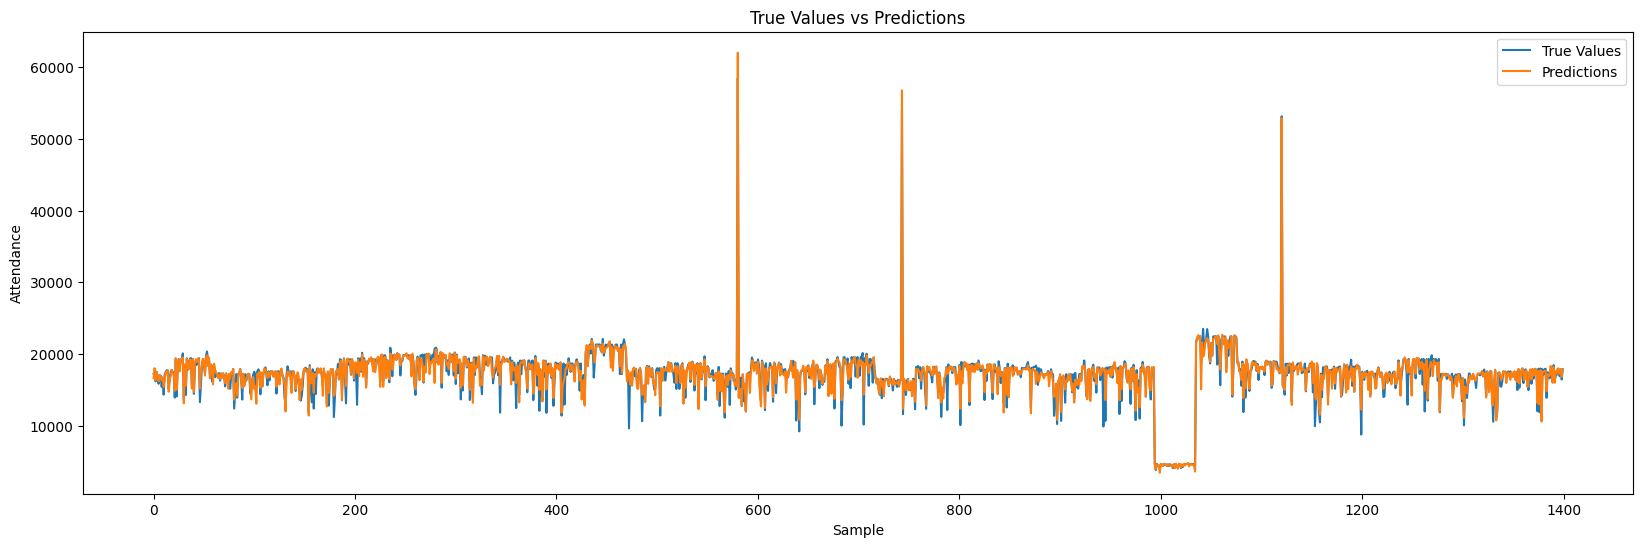

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

data = pd.read_excel('/weather2024.xlsx')


def time_to_minutes(time):
    return time.hour * 60 + time.minute

data['Event_Time_Minutes'] = data['Full Time'].apply(time_to_minutes)

data = data.drop(columns=['Full Time'])

data['Att.'] = pd.to_numeric(data['Att.'], errors='coerce')
data['Capacity'] = pd.to_numeric(data['Capacity'], errors='coerce')

data = data.dropna(subset=['Att.', 'Capacity'])

data['Normalized_Attendance'] = data['Att.'] / data['Capacity']

#remove outliers
lower_bound = data['Normalized_Attendance'].quantile(0.01)
upper_bound = data['Normalized_Attendance'].quantile(0.99)
data = data[(data['Normalized_Attendance'] >= lower_bound) & (data['Normalized_Attendance'] <= upper_bound)]


print(data[['Att.', 'Capacity', 'Normalized_Attendance']].head())


features = [
    'Simple Rating System', 'Attendance_moving_avg', 'Ave Age of Team',
    'Penalties ', 'Days Since COVID Shutdown', 'Previous Season Rank',
    'Shots per game', 'Order of Day', 'Ave Goals Scored ', 'SV %', 'Win %',
    'L', 'W', 'Day', 'Ave Goals Against', 'tmin', 'tmax', 'GP', 'Capacity', 'Event_Time_Minutes'
]


for col in features:
    data[col].fillna(data[col].median(), inplace=True)

#normalize features excluding capacity
scaler = MinMaxScaler()
X = data[features]
X_scaled = scaler.fit_transform(X)

y = data['Normalized_Attendance']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#build and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

#predictions
predictions = model.predict(X_test)

#change back to normal attendance
X_test_df = pd.DataFrame(X_test, columns=features)
predictions_actual = predictions * data['Capacity'].iloc[-len(X_test):].values
y_test_actual = y_test * data['Capacity'].iloc[-len(X_test):].values

#evaluate
mae = mean_absolute_error(y_test_actual, predictions_actual)
mse = mean_squared_error(y_test_actual, predictions_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions_actual)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

#predictions vs actual values
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='True Values')
plt.plot(range(len(predictions_actual)), predictions_actual, label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('Sample')
plt.ylabel('Attendance')
plt.legend()
plt.show()

# **Model 3 - Gradient boosting model with GridsearchCV and a 3 fold cross validation set**

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Test MAE: 447.2914571720942
Test MSE: 634676.7699895938
Test RMSE: 796.6660341633713
Test R² Score: 0.9563144438049047


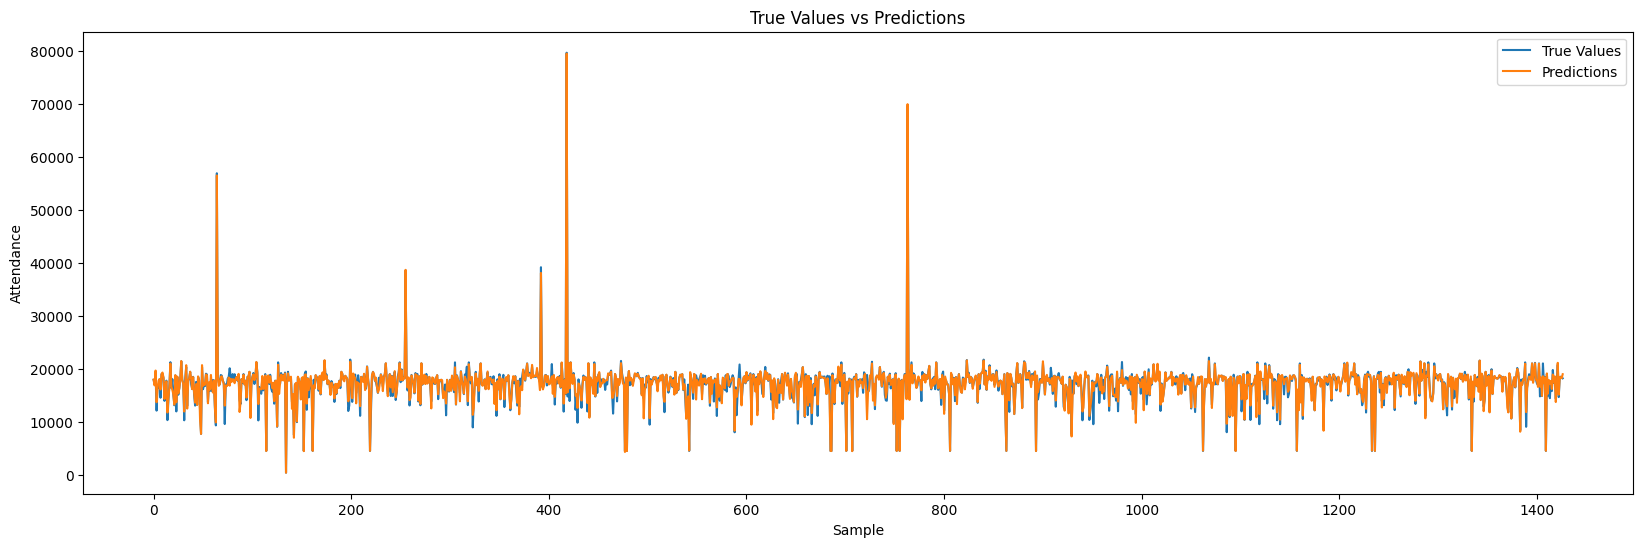

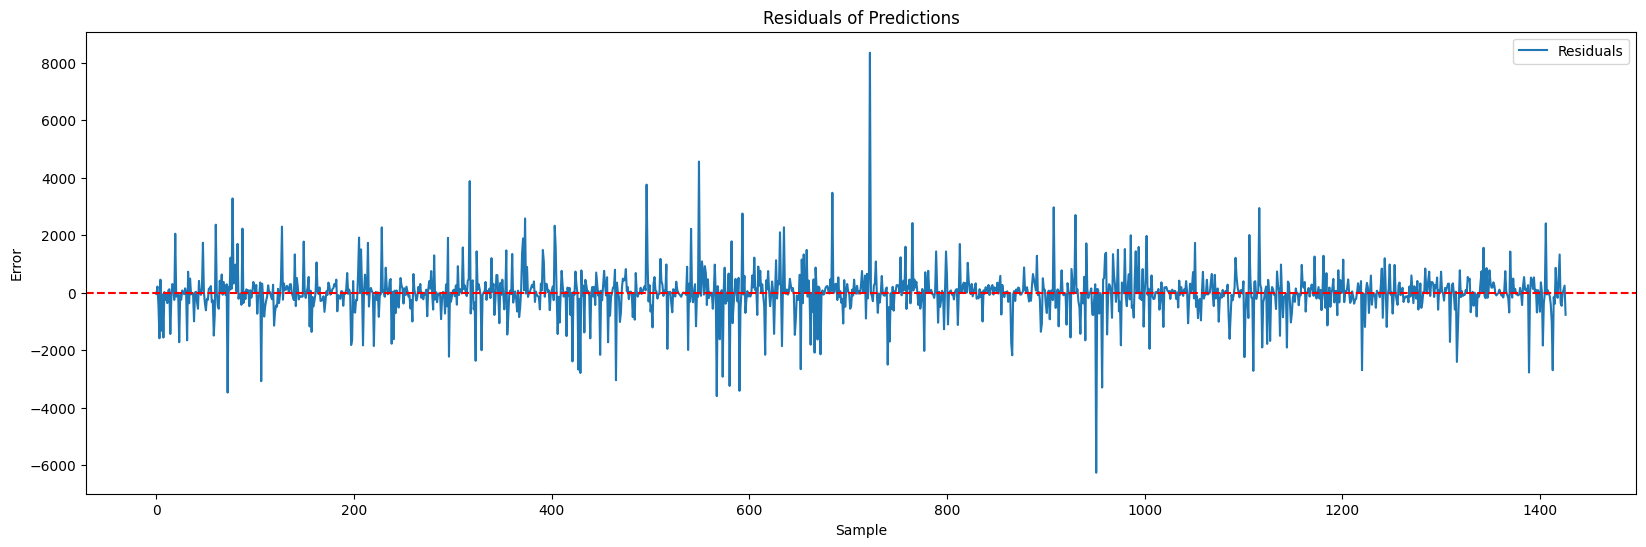

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt


file_path = '/weather2024.xlsx'
data = pd.read_excel(file_path)


def time_to_minutes(time):
    return time.hour * 60 + time.minute


if 'Full Time' in data.columns:
    data['Event_Time_Minutes'] = data['Full Time'].apply(time_to_minutes)
    data = data.drop(columns=['Full Time'])


data['Att.'] = pd.to_numeric(data['Att.'], errors='coerce')
data['Capacity'] = pd.to_numeric(data['Capacity'], errors='coerce')
data = data.dropna(subset=['Att.', 'Capacity'])


data['Normalized_Attendance'] = data['Att.'] / data['Capacity']


features = [
    'Simple Rating System', 'Attendance_moving_avg', 'Ave Age of Team',
    'Penalties ', 'Days Since COVID Shutdown', 'Previous Season Rank',
    'Shots per game', 'Order of Day', 'Ave Goals Scored ', 'SV %', 'Win %',
    'L', 'W', 'Day', 'Ave Goals Against', 'tmin', 'tmax', 'GP', 'Capacity', 'Event_Time_Minutes'
]


X = data[features]
y = data['Normalized_Attendance']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#hypertuning parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

#model
model = xgb.XGBRegressor(objective='reg:squarederror')

#using gridsearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_

#evaluate model
predictions = best_model.predict(X_test_scaled)


predictions_actual = predictions * X_test['Capacity'].values
y_test_actual = y_test * X_test['Capacity'].values

#evaluate model
mae = mean_absolute_error(y_test_actual, predictions_actual)
mse = mean_squared_error(y_test_actual, predictions_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions_actual)

print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R² Score: {r2}')

#True Values vs Predictions
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='True Values')
plt.plot(range(len(predictions_actual)), predictions_actual, label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('Sample')
plt.ylabel('Attendance')
plt.legend()
plt.show()

#plotting residuals
residuals = y_test_actual - predictions_actual
plt.figure(figsize=(20, 6))
plt.plot(range(len(residuals)), residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.legend()
plt.show()

# **Model 4 - Using cross-validation with 5 folds and RamdomizeSearchCV**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best cross-validation MAE: 0.026006936741955512
Test MAE: 457.48348989291213
Test MSE: 619720.3911934594
Test RMSE: 787.2232156088002
Test R² Score: 0.9573439091284651


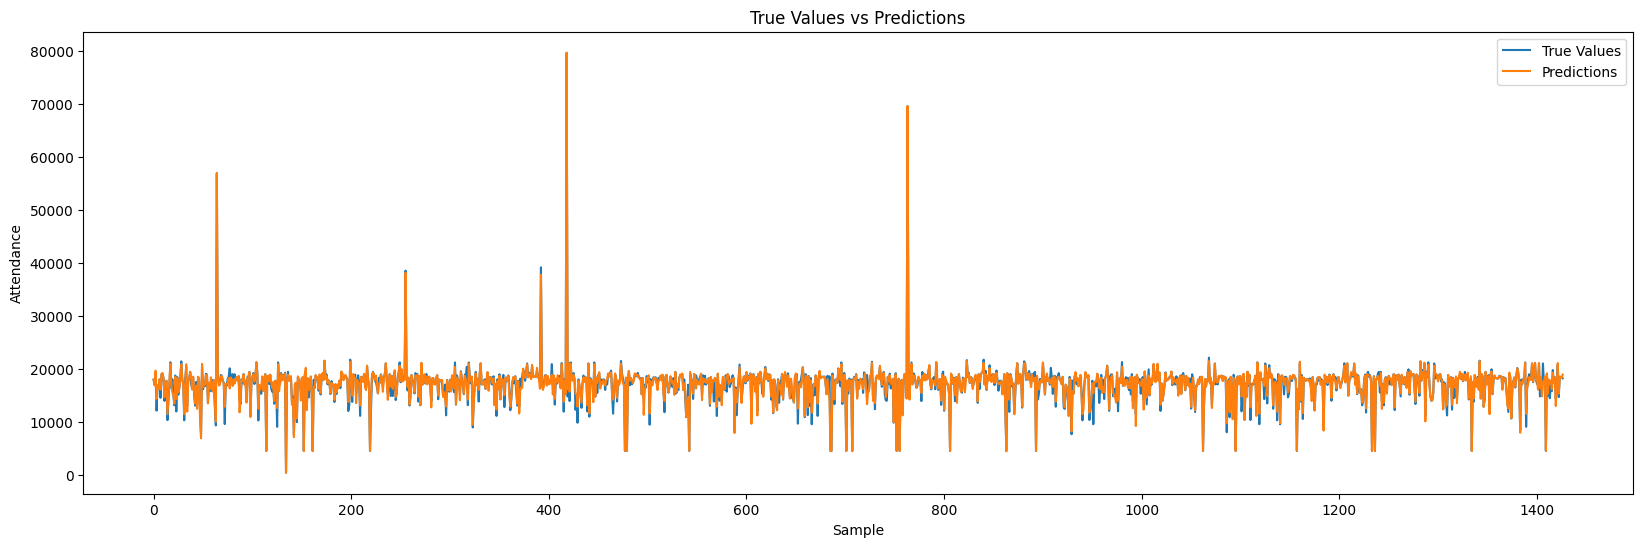

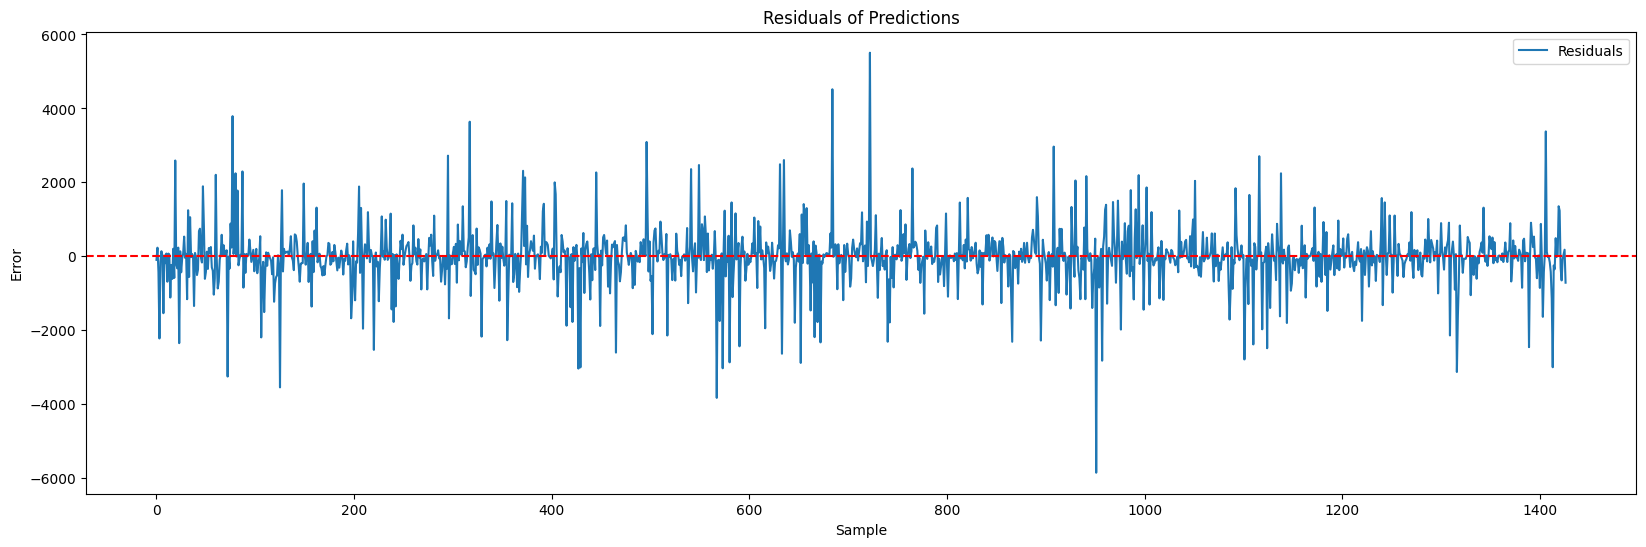

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt


file_path = '/weather2024.xlsx'
data = pd.read_excel(file_path)


def time_to_minutes(time):
    return time.hour * 60 + time.minute


data['Event_Time_Minutes'] = data['Full Time'].apply(time_to_minutes)
data = data.drop(columns=['Full Time'])  # Drop the datetime column after conversion


data['Att.'] = pd.to_numeric(data['Att.'], errors='coerce')
data['Capacity'] = pd.to_numeric(data['Capacity'], errors='coerce')
data = data.dropna(subset=['Att.', 'Capacity'])


data['Normalized_Attendance'] = data['Att.'] / data['Capacity']


features = [
    'Simple Rating System', 'Attendance_moving_avg', 'Ave Age of Team',
    'Penalties ', 'Days Since COVID Shutdown', 'Previous Season Rank',
    'Shots per game', 'Order of Day', 'Ave Goals Scored ', 'SV %', 'Win %',
    'L', 'W', 'Day', 'Ave Goals Against', 'tmin', 'tmax', 'GP', 'Capacity', 'Event_Time_Minutes'
]


X = data[features]
y = data['Normalized_Attendance']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = xgb.XGBRegressor(objective='reg:squarederror')


param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.01, 0.1],  # L1 regularization
    'reg_lambda': [1.0, 2.0]   # L2 regularization
}

#randomizedsearch
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to test
    scoring='neg_mean_absolute_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_scaled, y_train)


print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validation MAE: {-random_search.best_score_}')


best_model = random_search.best_estimator_


test_predictions = best_model.predict(X_test_scaled)

test_predictions_actual = test_predictions * X_test['Capacity'].values
y_test_actual = y_test * X_test['Capacity'].values


test_mae = mean_absolute_error(y_test_actual, test_predictions_actual)
test_mse = mean_squared_error(y_test_actual, test_predictions_actual)  # Fixed this line
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_actual)

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R² Score: {test_r2}')


plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='True Values')
plt.plot(range(len(test_predictions_actual)), test_predictions_actual, label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('Sample')
plt.ylabel('Attendance')
plt.legend()
plt.show()


residuals = y_test_actual - test_predictions_actual
plt.figure(figsize=(20, 6))
plt.plot(range(len(residuals)), residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.legend()
plt.show()

 **Model 5 - Using XGBoost automatic feature selection instead of predetermined features RandomSearchCV and 5 fold cross validation with L1 and L2 Regularization**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best cross-validation MAE: 0.017268108056392454
Test MAE: 283.2172006117696
Test MSE: 240036.79062301683
Test RMSE: 489.9354963901032
Test R² Score: 0.972422733742313


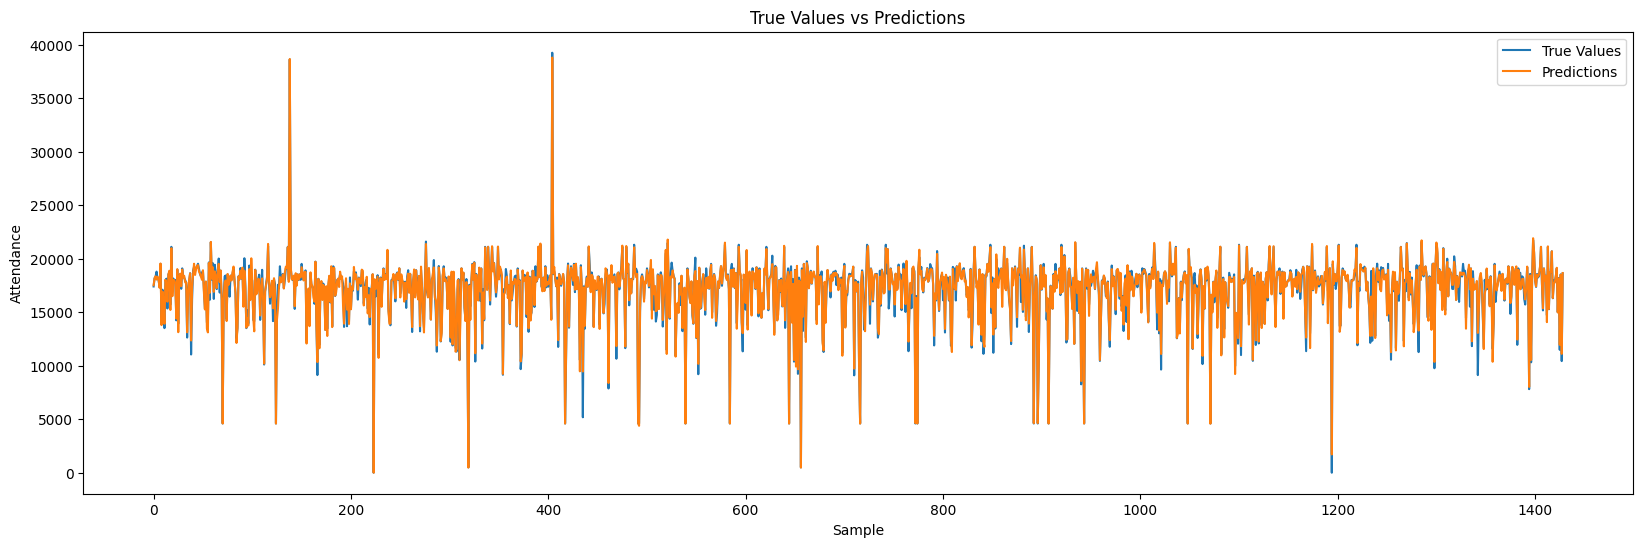

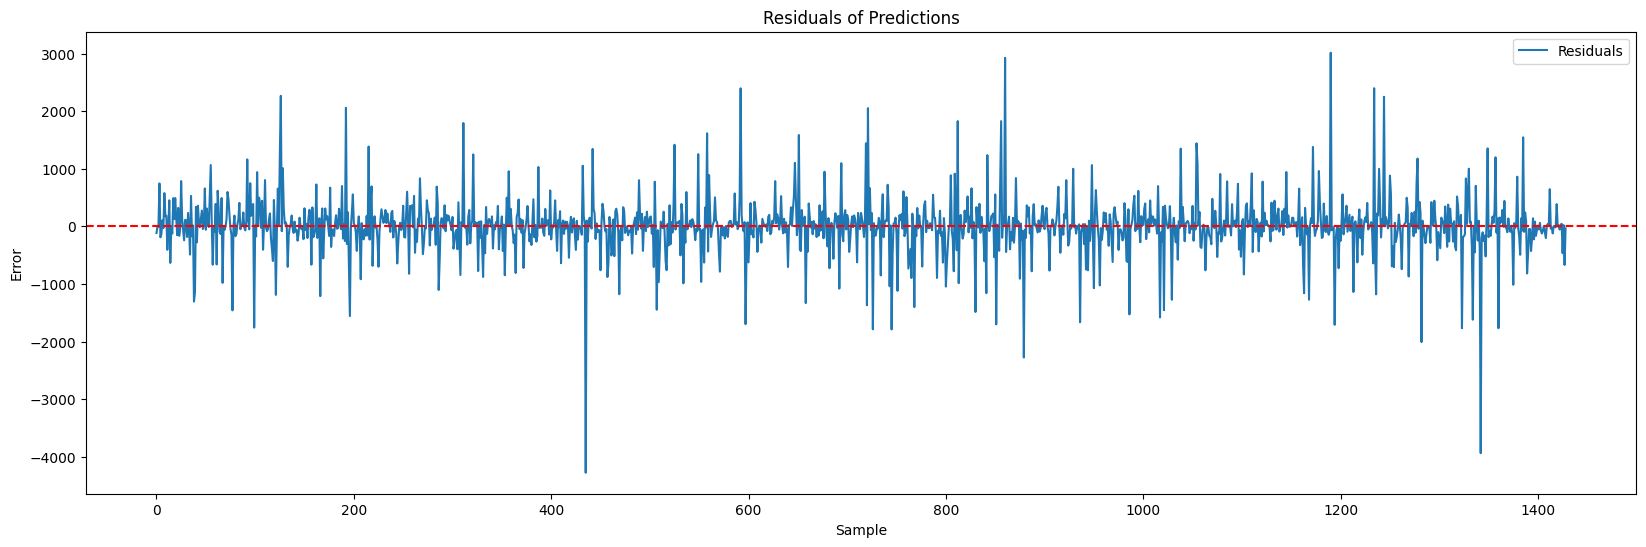

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt


file_path = '/weather2024.xlsx'
data = pd.read_excel(file_path)

def time_to_minutes(time):
    return time.hour * 60 + time.minute

if 'Full Time' in data.columns:
    data['Event_Time_Minutes'] = data['Full Time'].apply(time_to_minutes)
    data = data.drop(columns=['Full Time'])


data = data.drop(columns=['Att.', 'Unsold Seats'], errors='ignore')

data['Capacity'] = pd.to_numeric(data['Capacity'], errors='coerce')
data = data.dropna(subset=['Capacity'])

y = data['Att. %']

features = data.select_dtypes(include=[np.number]).columns.drop(['Att. %'])

X = data[features]

X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_capacity = data.loc[X_test.index, 'Capacity']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.01, 0.1],
    'reg_lambda': [1.0, 2.0]
}

model = xgb.XGBRegressor(objective='reg:squarederror')


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validation MAE: {-random_search.best_score_}')


best_model = random_search.best_estimator_

test_predictions = best_model.predict(X_test_scaled)

test_predictions_actual = test_predictions * X_test_capacity.values
y_test_actual = y_test * X_test_capacity.values

test_mae = mean_absolute_error(y_test_actual, test_predictions_actual)
test_mse = mean_squared_error(y_test_actual, test_predictions_actual)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_actual)

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R² Score: {test_r2}')


plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='True Values')
plt.plot(range(len(test_predictions_actual)), test_predictions_actual, label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('Sample')
plt.ylabel('Attendance')
plt.legend()
plt.show()

residuals = y_test_actual - test_predictions_actual
plt.figure(figsize=(20, 6))
plt.plot(range(len(residuals)), residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.legend()
plt.show()

Sorted Feature Importances:
Rivalry2                          0.283107
Playoffs Previous Year?           0.236325
Previous Season Rank              0.063963
Attendance_moving_avg             0.058313
Capacity                          0.032310
Ave Goals Scored                  0.031082
Total Games Played this Season    0.028687
Ave Goals Against                 0.027070
Number of Star Players            0.026280
Ave Age of Team                   0.025477
Lagged_attendance_1               0.020397
Shots Taken                       0.019694
Lagged_attendance_2               0.018895
Penalties                         0.016827
Days Since COVID Shutdown         0.014860
Simple Rating System              0.014394
Shots per game                    0.012487
Month                             0.011466
SV %                              0.009702
Year                              0.009222
Win %                             0.006435
Order of Month                    0.004789
tmin                      

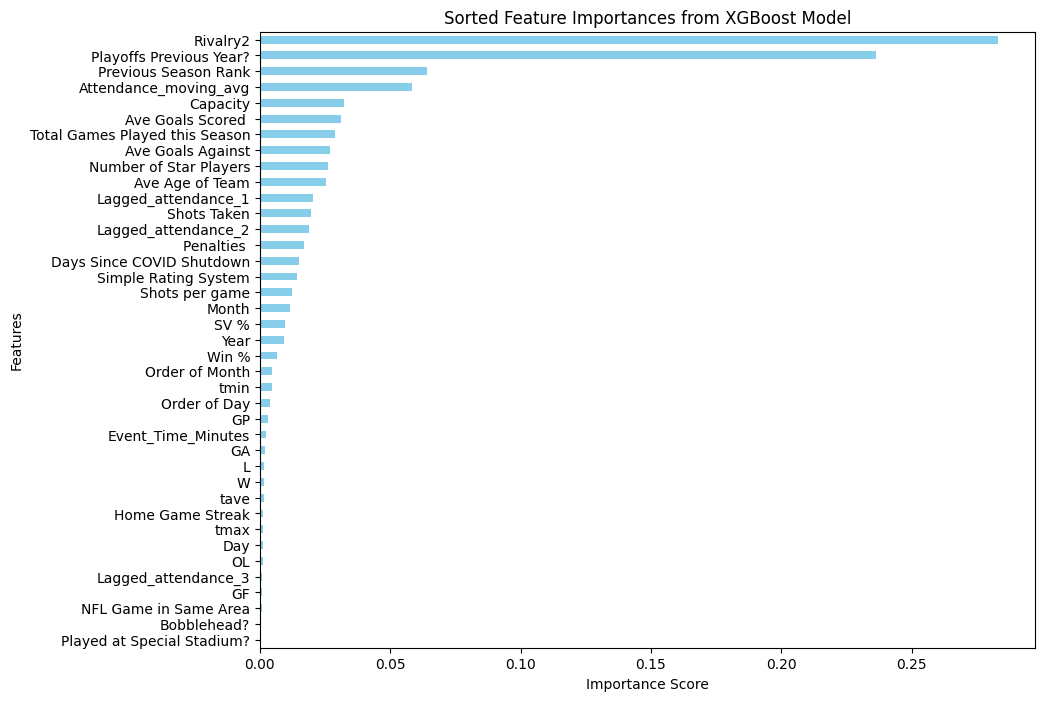

In [ ]:
#what features did the automatic feature selection choose
feature_importances = best_model.feature_importances_

importance_series = pd.Series(feature_importances, index=features)

#sort
importance_series_sorted = importance_series.sort_values(ascending=False)


print("Sorted Feature Importances:")
print(importance_series_sorted)


plt.figure(figsize=(10, 8))
importance_series_sorted.plot(kind='barh', color='skyblue')
plt.title('Sorted Feature Importances from XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

Top 20 Sorted Feature Importances:
                           Feature  Importance
0                         Rivalry2    0.283107
1          Playoffs Previous Year?    0.236325
2             Previous Season Rank    0.063963
3            Attendance_moving_avg    0.058313
4                         Capacity    0.032310
5                Ave Goals Scored     0.031082
6   Total Games Played this Season    0.028687
7                Ave Goals Against    0.027070
8           Number of Star Players    0.026280
9                  Ave Age of Team    0.025477
10             Lagged_attendance_1    0.020397
11                     Shots Taken    0.019694
12             Lagged_attendance_2    0.018895
13                      Penalties     0.016827
14       Days Since COVID Shutdown    0.014860
15            Simple Rating System    0.014394
16                  Shots per game    0.012487
17                           Month    0.011466
18                            SV %    0.009702
19                       

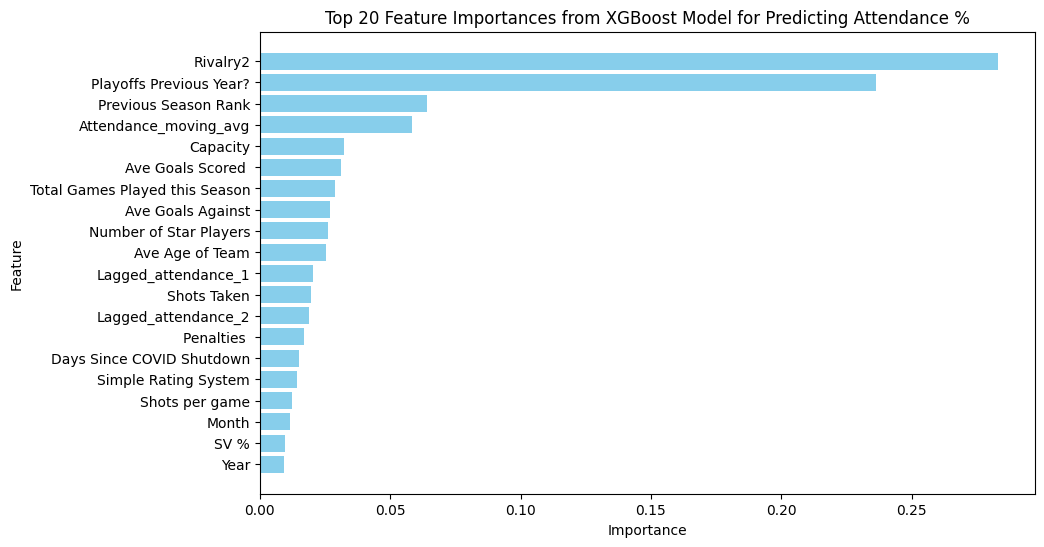

In [ ]:


feature_importances = best_model.feature_importances_

importance_series = pd.Series(feature_importances, index=features)

importance_series_sorted = importance_series.sort_values(ascending=False).head(20)

feature_importance_df = pd.DataFrame({
    'Feature': importance_series_sorted.index,
    'Importance': importance_series_sorted.values
})

print("Top 20 Sorted Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances from XGBoost Model for Predicting Attendance %')
plt.gca().invert_yaxis()
plt.show()